In [1]:
import pandas as pd

# Total species

In [2]:
results = pd.read_csv('seen_list.csv')

In [3]:
results[results['number of people seeing species'] > 0].shape[0]

6397

# How many genera ("genuses") have we seen?

In [4]:
results[['genus', 'species']] = results['scientific name'].str.split(' ', expand=True)

In [5]:
genera = results['genus'].unique()

In [6]:
for genus in genera:
    total_sightings_of_genus = sum(results.loc[results['genus'] == genus, 'number of people seeing species'].values)
    results.loc[results['genus']==genus, 'total sightings of genus'] = total_sightings_of_genus

In [7]:
unfound_genera = results[results['total sightings of genus'] == 0]['genus'].unique()

In [8]:
print(f'Of {len(genera)} genera, we have seen {len(genera) - len(unfound_genera)}.')
print(f"That means we're missing {len(unfound_genera)} genera!")

Of 2265 genera, we have seen 1798.
That means we're missing 467 genera!


### How many species are in each unfound genus?

In [9]:
unfound_genera_species = []
print("Missing genera with more than 5 representatives:")
for genus in unfound_genera:
    num_spp = results.loc[results['genus']==genus].shape[0]
    unfound_genera_species.append(num_spp)
    if num_spp > 5:
        print(genus, f'({num_spp} species)')

Missing genera with more than 5 representatives:
Alopecoenas (13 species)
Coenocorypha (6 species)
Micropsitta (6 species)
Charmosyna (14 species)
Lorius (6 species)
Eos (6 species)
Melidectes (9 species)
Ptiloprora (6 species)
Melanocharis (6 species)
Pomarea (9 species)
Paradisaea (7 species)
Spelaeornis (8 species)
Sheppardia (9 species)


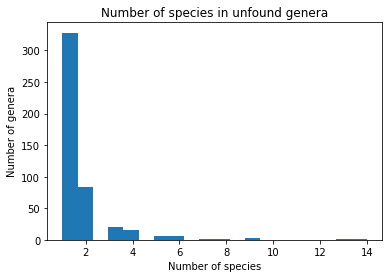

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
n, bins, patches = plt.hist(unfound_genera_species, bins=20)
xlabel = plt.xlabel('Number of species')
ylabel = plt.ylabel('Number of genera')
title = plt.title('Number of species in unfound genera')
plt.show()

Unsurprisingly, most of the unfound genera have only one or two representatives.